In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the train and test datasets

In [2]:
train_df = pd.read_html("https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml")

In [3]:
test_df = pd.read_html('https://docs.google.com/spreadsheets/d/e/2PACX-1vRyvZ7lknwiSghK9aen1SaTEYoN3JS40rrGLpcyrsVZy1tB2T4gn6Y3-cdzPUFCPMmmqREWefW3kl4_/pubhtml')

In [4]:
header_row = train_df[0].iloc[0]
train_df = pd.DataFrame(train_df[0].values[1:], columns=header_row).drop(columns=1)

In [5]:
header_row = test_df[0].iloc[0]
test_df = pd.DataFrame(test_df[0].values[1:], columns=header_row).drop(columns=1)

In [6]:
train_df

,x,y
0,24,21.54945196
1,50,47.46446305
2,15,17.21865634
3,38,36.58639803
4,87,87.28898389
...,...,...
695,58,58.59500642
696,93,94.62509374
697,82,88.60376995
698,66,63.64868529


In [7]:
test_df

,x,y
0,77,79.77515201
1,21,23.17727887
2,22,25.60926156
3,20,17.85738813
4,36,41.84986439
...,...,...
295,71,68.5458879
296,46,47.33487629
297,55,54.09063686
298,62,63.29717058


In [8]:
train_df[['y']]

,y
0,21.54945196
1,47.46446305
2,17.21865634
3,36.58639803
4,87.28898389
...,...
695,58.59500642
696,94.62509374
697,88.60376995
698,63.64868529


In [9]:
missing_values = train_df.isnull().sum()
missing_values

0
x    0
y    1
dtype: int64

In [10]:
missing_values = test_df.isnull().sum()
missing_values

0
x    0
y    0
dtype: int64

In [11]:
train_df.to_csv("train.csv",index=False)

In [12]:
test_df.to_csv("test.csv",index=False)

Conversion Done Now loading dataset locally

In [13]:
df1 = pd.read_csv('train.csv')

In [14]:
df2=pd.read_csv('test.csv')

In [15]:
df1['y'] = df1['y'].fillna(df1['y'].mean())

In [16]:
df1

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [17]:
missing_values = df1.isnull().sum()
missing_values

x    0
y    0
dtype: int64

In [18]:
# Assuming your train data has two columns: X (features) and Y (target)
# Create the linear regression model
model = LinearRegression()

# Train the model
X_train = df1[['x']]
y_train = df1['y']
model.fit(X_train, y_train)



LinearRegression()

In [19]:
# Make predictions on the test data
X_test = df2[['x']]
y_pred = model.predict(X_test)



In [20]:
y_test = df2[['y']]

InvalidIndexError: (slice(None, None, None), None)

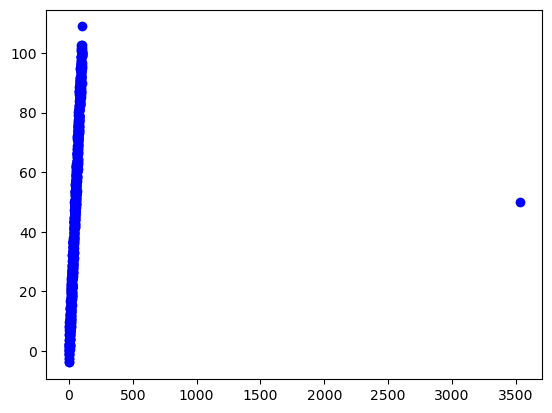

In [21]:
# Plot the training data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [22]:
# Print the predicted values for the test data
print("Predicted values for the test data:")
print(y_pred)

Predicted values for the test data:
[50.95653945 48.37030441 48.41648718 48.32412164 49.06304594 48.0932078
 50.26379792 51.78782928 48.32412164 47.63138011 47.58519734 48.27793887
 51.83401205 50.26379792 49.06304594 48.0932078  50.40234623 48.04702503
 51.41836714 50.5870773  51.51073267 49.75578747 51.51073267 48.64740102
 51.88019482 50.07906685 51.04890499 48.37030441 51.69546375 48.64740102
 51.97256036 48.8321321  48.92449763 51.09508776 48.69358379 49.57105639
 49.848153   50.5870773  48.69358379 48.92449763 51.60309821 50.67944284
 49.7096047  50.91035668 47.58519734 49.10922871 50.63326007 50.54089453
 49.24777701 49.01686317 51.74164652 51.4645499  49.80197024 48.8321321
 50.12524962 47.40046627 49.20159424 50.35616346 50.5870773  50.03288408
 48.00084226 50.72562561 50.91035668 50.21761515 51.18745329 48.2317561
 49.29395978 49.7096047  49.94051854 48.00084226 49.52487362 48.00084226
 51.04890499 49.848153   48.0932078  48.69358379 51.14127052 50.5870773
 49.80197024 51.279

In [23]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Calculate the correlation between actual and predicted values
correlation = df1['y'].corr(pd.Series(y_pred.ravel()))

# Print the regression metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Correlation between Actual and Predicted Values: {correlation}")

Mean Absolute Error (MAE): 23.62866135690382
Mean Squared Error (MSE): 770.3012816202481
Root Mean Squared Error (RMSE): 27.754302038066964
R-squared (R2): 0.08551543942307593
Correlation between Actual and Predicted Values: 0.030744373018393414
